<h1>Churn Analysis</h1>

In [2]:
import pandas as pd
import csv
import numpy as np

In [3]:
pwd

'/resources/my Notebooks/Churn Analysis ECOMM'

In [4]:
path = "/resources/my Notebooks/Churn Analysis ECOMM/Caso Práctico - BA Manager_blanco1.csv"
df = pd.read_csv(path, delimiter=";", decimal=",")

In [5]:
df.head()

,ID,Meses de suscripción,Fuga,Índice de Satisfacción (IS),Var. del IS,Nro. de Casos de Soporte,Var. Nro. de Casos de Soporte,Prioridad del Soporte,Var. de la Prioridad del Soporte,Var. Nro. Logins,Var. Uso del Servicio,Var. Beneficio para el Cliente,Var. Días desde Ult. Conexión
0,1,134,0,124,8,0,0,0.0,0.0,0,0,-32,31
1,2,116,0,276,-20,0,0,0.0,0.0,86,0,-66,0
2,3,114,0,360,-10,2,2,3.0,3.0,26,-2,1814,0
3,4,112,0,156,-74,0,0,0.0,0.0,-14,0,60,14
4,5,110,0,236,126,0,0,0.0,0.0,10,2,1990,0


In [6]:
print(df.dtypes)

ID                                    int64
Meses de suscripción                  int64
Fuga                                  int64
Índice de Satisfacción (IS)           int64
Var. del IS                           int64
Nro. de Casos de Soporte              int64
Var. Nro. de Casos de Soporte         int64
Prioridad del Soporte               float64
Var. de la Prioridad del Soporte    float64
Var. Nro. Logins                      int64
Var. Uso del Servicio                 int64
Var. Beneficio para el Cliente        int64
Var. Días desde Ult. Conexión         int64
dtype: object


In [7]:
df.rename(columns={'Meses de suscripción':'Meses_sus', "Índice de Satisfacción (IS)":"IS", "Var. del IS":"Var_IS", "Nro. de Casos de Soporte":"Casos_soporte","Var. Nro. de Casos de Soporte":"Var_casos_soporte", "Prioridad del Soporte":"Prioridad_soporte", "Var. de la Prioridad del Soporte":"Var_prioridad_soporte", "Var. Nro. Logins": "Var_logins", "Var. Uso del Servicio":"Var_servicio", "Var. Beneficio para el Cliente":"Var_beneficio", "Var. Días desde Ult. Conexión":"Var_ult_con"}, inplace=True)

In [8]:
print(df.dtypes)

ID                         int64
Meses_sus                  int64
Fuga                       int64
IS                         int64
Var_IS                     int64
Casos_soporte              int64
Var_casos_soporte          int64
Prioridad_soporte        float64
Var_prioridad_soporte    float64
Var_logins                 int64
Var_servicio               int64
Var_beneficio              int64
Var_ult_con                int64
dtype: object


In [9]:
X = df[["Meses_sus", "IS", "Var_IS", "Casos_soporte", "Var_casos_soporte", 
         "Prioridad_soporte", "Var_prioridad_soporte", "Var_logins", "Var_servicio", 
         "Var_beneficio", "Var_ult_con"]]

In [10]:
y = df[["Fuga"]]

In [11]:
X.corr()

,Meses_sus,IS,Var_IS,Casos_soporte,Var_casos_soporte,Prioridad_soporte,Var_prioridad_soporte,Var_logins,Var_servicio,Var_beneficio,Var_ult_con
Meses_sus,1.000000,0.289892,-0.186840,-0.109143,-0.016036,-0.074617,-0.027330,-0.052510,-0.079718,0.049194,0.039694
IS,0.289892,1.000000,0.186585,0.305270,-0.031750,0.371299,-0.007490,0.331820,0.038927,0.077131,-0.086395
Var_IS,-0.186840,0.186585,1.000000,0.266233,0.277727,0.230583,0.238848,0.460227,0.293150,-0.024052,0.028181
Casos_soporte,-0.109143,0.305270,0.266233,1.000000,0.413300,0.672877,0.283226,0.344938,0.047606,-0.009332,-0.032384
Var_casos_soporte,-0.016036,-0.031750,0.277727,0.413300,1.000000,0.230297,0.517611,0.275300,0.020214,0.000901,0.011494
Prioridad_soporte,-0.074617,0.371299,0.230583,0.672877,0.230297,1.000000,0.559746,0.305522,0.035298,-0.001118,-0.054617
Var_prioridad_soporte,-0.027330,-0.007490,0.238848,0.283226,0.517611,0.559746,1.000000,0.228505,0.030348,-0.016443,0.029953
Var_logins,-0.052510,0.331820,0.460227,0.344938,0.275300,0.305522,0.228505,1.000000,0.167840,-0.029320,-0.024869
Var_servicio,-0.079718,0.038927,0.293150,0.047606,0.020214,0.035298,0.030348,0.167840,1.000000,-0.010130,-0.001186
Var_beneficio,0.049194,0.077131,-0.024052,-0.009332,0.000901,-0.001118,-0.016443,-0.029320,-0.010130,1.000000,-0.016116


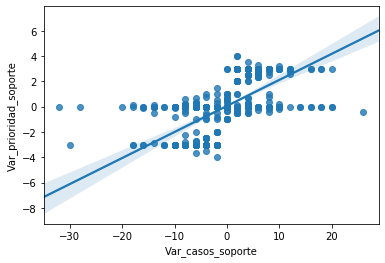

In [12]:
import seaborn as sns
sns.regplot(x='Var_casos_soporte', y="Var_prioridad_soporte", data=X)

In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1609, 11) (1609, 1)
Test set: (403, 11) (403, 1)


In [241]:
%%capture
# Logistic Regression Model

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict

#valid solver values {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
LR = LogisticRegression(C=1, solver="sag")
LR.fit(X_train, y_train)

LR2 = LogisticRegressionCV(Cs=1, solver="sag", cv=5, scoring="f1_weighted")
LR2.fit(X_train, y_train)

cross_val_score(LR, X_train, y_train, cv=5).mean()

In [186]:
yhat = LR.predict(X_test)
yhat_cv = LR2.predict(X_test)

print(yhat)
print(yhat_cv)
print(y_test.values.transpose())

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0

In [187]:
yhat_prob = LR.predict_proba(X_test)
yhat_cv_prob = LR2.predict_proba(X_test)

print(yhat_prob[:5])
print("\n", yhat_prob_cv[:5])

[[0.8624493  0.1375507 ]
 [0.90691866 0.09308134]
 [0.95856393 0.04143607]
 [0.49764116 0.50235884]
 [0.95394477 0.04605523]]

 [[0.8315074  0.1684926 ]
 [0.88203456 0.11796544]
 [0.93740489 0.06259511]
 [0.49925045 0.50074955]
 [0.93194365 0.06805635]]


In [214]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix

print("Jaccard yhat:", metrics.jaccard_similarity_score(y_test, yhat))
J_LR = metrics.jaccard_similarity_score(y_test, yhat_cv)
print("Jaccard yhat_cv:", J_LR)

print("f1_score:", metrics.f1_score(y_test, yhat_cv, average="weighted"))
f1_LR = metrics.f1_score(y_test, yhat_cv, average="weighted")
print("f1_score_cv:", f1_LR)

Jaccard yhat: 0.9578163771712159
Jaccard yhat_cv: 0.9578163771712159
f1_score: 0.9444627901637591
f1_score_cv: 0.9444627901637591


In [213]:
print("Confusion Matrix:\n", confusion_matrix(y_test, yhat, labels=[1,0]))
print("\n",classification_report(y_test, yhat))

Confusion Matrix:
 [[  1  13]
 [  4 385]]

               precision    recall  f1-score   support

           0       0.97      0.99      0.98       389
           1       0.20      0.07      0.11        14

   micro avg       0.96      0.96      0.96       403
   macro avg       0.58      0.53      0.54       403
weighted avg       0.94      0.96      0.95       403



In [190]:
print(confusion_matrix(y_test, yhat_cv, labels=[1,0]))
print()
print(classification_report(y_test, yhat_cv))

[[  0  14]
 [  3 386]]

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       389
           1       0.00      0.00      0.00        14

   micro avg       0.96      0.96      0.96       403
   macro avg       0.48      0.50      0.49       403
weighted avg       0.93      0.96      0.94       403



In [191]:
from sklearn.metrics import log_loss
print("LogLoss: : %.2f" % log_loss(y_test, yhat_prob))
print("LogLoss with cv: : %.2f" % log_loss(y_test, yhat_prob_cv))

LogLoss: : 0.27
LogLoss with cv: : 0.28


In [159]:
# Support Vector Machines model

from1 sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
yhat2 = clf.predict(X_test)
yhat2

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [215]:
J_SVM = metrics.jaccard_similarity_score(y_test, yhat2)
print(J_SVM)
f1_SVM = metrics.f1_score(y_test, yhat2, average="weighted")
print(f1_SVM)

0.9627791563275434
0.9509965795562579


In [197]:
print(confusion_matrix(y_test, yhat, labels=[1,0]))
print(classification_report(y_test, yhat))

[[  1  13]
 [  4 385]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       389
           1       0.20      0.07      0.11        14

   micro avg       0.96      0.96      0.96       403
   macro avg       0.58      0.53      0.54       403
weighted avg       0.94      0.96      0.95       403



In [162]:
# K-Nearest Neightbors Model

from sklearn import preprocessing
SS = preprocessing.StandardScaler()
SS.fit(X)
X_std = SS.transform(X)
X_std[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


array([[ 4.6435779 , -0.37599251, -0.01956563, -0.41822397,  0.02244018,
        -0.61278763, -0.033977  , -0.38679208, -0.0475727 , -0.06700719,
         1.38826074],
       [ 3.853668  ,  0.7773197 , -0.46872992, -0.41822397,  0.02244018,
        -0.61278763, -0.033977  ,  0.7464567 , -0.0475727 , -0.08332369,
        -0.06840529],
       [ 3.76590023,  1.41467645, -0.3083141 ,  0.1964339 ,  0.5798432 ,
         1.66553047,  2.06656235, -0.04418198, -0.37203467,  0.81888289,
        -0.06840529],
       [ 3.67813247, -0.13318994, -1.33497533, -0.41822397,  0.02244018,
        -0.61278763, -0.033977  , -0.57127443, -0.0475727 , -0.02285665,
         0.58944389],
       [ 3.5903647 ,  0.47381648,  1.87334102, -0.41822397,  0.02244018,
        -0.61278763, -0.033977  , -0.25501896,  0.27688926,  0.90334478,
        -0.06840529]])

In [163]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=1)
k = 4
#Create object and fit model

neigh = KNeighborsClassifier(n_neighbors = k)
neigh.fit(X_train,y_train)
neigh

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [164]:
yhat3 = neigh.predict(X_test)
yhat3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [104]:
print("y predict")
print(pd.Series(yhat3).value_counts())

print("\ny values")
print(y_test["Fuga"].value_counts())

y predict
0    402
1      1
dtype: int64

y values
0    388
1     15
Name: Fuga, dtype: int64


In [107]:
print(confusion_matrix(y_test, yhat3, labels=[1,0]))
print()
print(classification_report(y_test, yhat3))

[[  1  14]
 [  0 388]]

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       388
           1       1.00      0.07      0.12        15

   micro avg       0.97      0.97      0.97       403
   macro avg       0.98      0.53      0.55       403
weighted avg       0.97      0.97      0.95       403



In [219]:
J_KNN = metrics.jaccard_similarity_score(y_test, yhat3)
print(J_KNN)

f1_KNN = metrics.f1_score(y_test, yhat3, average="weighted")
print(f1_KNN)

0.9627791563275434
0.9469559843525017


<h1>Summary</h1>

In [237]:
ev_dict = {"Jaccard Index":{"LR":J_LR, "SVM":J_SVM, "KNN":J_KNN}, 
     "F1-Score":{"LR":f1_LR, "SVM":f1_SVM, "KNN":f1_KNN}}
ev_df = pd.DataFrame(d)
ev_df = ev_df.round(decimals=3)
ev_df

,Jaccard Index,F1-Score
LR,0.958,0.944
SVM,0.963,0.951
KNN,0.963,0.947
